In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.misc import derivative
from scipy.optimize import brent, fsolve, fminbound

from sympy import diff, symbols, exp, log, lambdify
from sympy.solvers import solve

# Example

**pdf**: $\large f(x) = \theta e^{-\theta x}$

## by sympy

In [2]:
def pdf(theta, x):
    return theta * exp(-theta*x)

In [4]:
def llf(x0, f, samples):
    result = 0
    for s in samples:
        result += log(f(x0, s))
    return result

In [5]:
x = symbols('x')

In [6]:
y = llf(x, pdf, [3,3,3,1,2])

* Find $\theta$ s.t. $\displaystyle \frac{\partial \mathcal{L}(\theta;\mathbf{x})}{\partial \theta}=0$

In [34]:
print(solve(y.diff(x, 1), x))

[5/12]


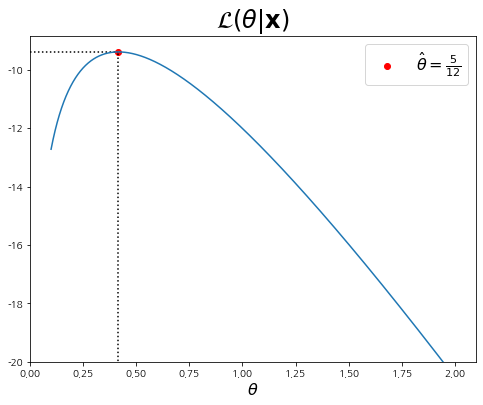

In [33]:
ff  = lambdify(x, y, 'numpy')
xx = np.linspace(0.1, 2, 10000)
yy = ff(xx)
mle = np.array(solve(y.diff(x, 1), x), dtype = np.float64)

fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.vlines(mle, yy.min(), yy.max(), linestyle=':', linewidth=1.5, color='k')
ax.hlines(ff(mle), .0, mle, linestyle=':', linewidth=1.5, color='k')
ax.plot(xx, yy)
ax.scatter(mle, ff(mle), color='r', label = r'$\hat\theta=\frac{{{}}}{{{}}}$'.format( *str(solve(y.diff(x, 1), x)[0]).split('/') ) )
plt.title(r'$\mathcal{L}( \theta | \mathbf{x})$', fontsize=24)
plt.xlabel(r'$\theta$', fontsize=16)
plt.legend(fontsize=16)
ax.set_xlim(left=0)
ax.set_ylim(bottom=-20)
plt.show()

## by scipy

In [9]:
def pdf_(theta, x):
    return theta * np.exp(-theta*x)

In [10]:
def llf_(x0, f, samples):
    result = 0
    for s in samples:
        result += np.log(f(x0, s))
    return result

In [11]:
xx_ = np.linspace(.1, 2, 1000)
yy_ = np.array([llf(i, pdf_, [3,3,3,1,2]) for i in xx_])

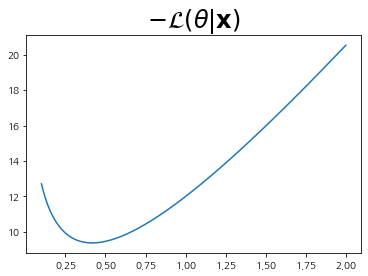

In [12]:
plt.plot(xx_, -yy_)
plt.title(r'$-\mathcal{L}( \theta | \mathbf{x})$', fontsize=24)
plt.show()

* Find $\theta$ s.t.  $\large \underset{\theta}{\mathrm{arg\,min}}\; -\mathcal{L}(\theta;\mathbf{x})$

In [15]:
def llf_neg_(x0, f, samples):
    return -llf_(x0, f, samples)

In [35]:
print('mle by brent method:',brent(llf_neg_, args=(pdf_, [3,3,3,1,2]), brack=(.1, .4,  2.)) )

mle by brent method: 0.41666666687827514


In [36]:
print('mle by bounded minimization:',fminbound(llf_neg_, .0, 2., args=(pdf_, [3,3,3,1,2])))

mle by bounded minimization: 0.4166652644065801
